# 1. Data Preprocessing

Importing data from the csv file and cleaning the raw data into usable columns for further data analysis

#

In [28]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics
import matplotlib.pyplot as plt
%matplotlib inline

admissions = pd.read_csv("telecom_sample.csv")
admissions.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,Female,55,2,111.22,6956.08,Month-to-month,No
1,2,Male,33,21,75.53,5692.23,Month-to-month,Yes
2,3,Female,30,51,94.74,4839.18,Month-to-month,No
3,4,Female,20,5,75.43,6706.95,Month-to-month,No
4,5,Male,53,47,70.88,3958.48,Month-to-month,Yes


In [29]:
#data preprocess is the first step!
admissions = admissions.dropna()
df=admissions

In [30]:
df['Churn'] = df.Churn.apply(lambda x: 0 if x == 'No' else 1)
df['Gender'] = df.Gender.apply(lambda x: 0 if x == 'Female' else 1)

In [31]:
df

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,0,55,2,111.22,6956.08,Month-to-month,0
1,2,1,33,21,75.53,5692.23,Month-to-month,1
2,3,0,30,51,94.74,4839.18,Month-to-month,0
3,4,0,20,5,75.43,6706.95,Month-to-month,0
4,5,1,53,47,70.88,3958.48,Month-to-month,1
...,...,...,...,...,...,...,...,...
995,996,1,25,55,75.56,1067.28,Two year,0
996,997,1,45,11,101.68,6703.63,One year,0
997,998,0,28,59,60.80,1447.63,One year,0
998,999,1,68,33,24.60,3932.29,Month-to-month,0


In [32]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [33]:
df=df.join(pd.get_dummies(df['Contract'], prefix = 'Contract'))

In [34]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,55,2,111.22,6956.08,Month-to-month,0,True,False,False
1,2,1,33,21,75.53,5692.23,Month-to-month,1,True,False,False
2,3,0,30,51,94.74,4839.18,Month-to-month,0,True,False,False
3,4,0,20,5,75.43,6706.95,Month-to-month,0,True,False,False
4,5,1,53,47,70.88,3958.48,Month-to-month,1,True,False,False


In [35]:
# Remove the temp_F column.
df.drop('Contract', axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               1000 non-null   int64  
 1   Gender                   1000 non-null   int64  
 2   Age                      1000 non-null   int64  
 3   Tenure                   1000 non-null   int64  
 4   MonthlyCharges           1000 non-null   float64
 5   TotalCharges             1000 non-null   float64
 6   Churn                    1000 non-null   int64  
 7   Contract_Month-to-month  1000 non-null   bool   
 8   Contract_One year        1000 non-null   bool   
 9   Contract_Two year        1000 non-null   bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 57.7 KB




# 2. Exploratory Data Analysis (EDA):

Finding the relation between different independent variables and the dependent varible using graphs


In [37]:
df.Churn.unique(), df.Churn.value_counts()

(array([0, 1], dtype=int64),
 Churn
 0    513
 1    487
 Name: count, dtype: int64)

<Axes: xlabel='Churn'>

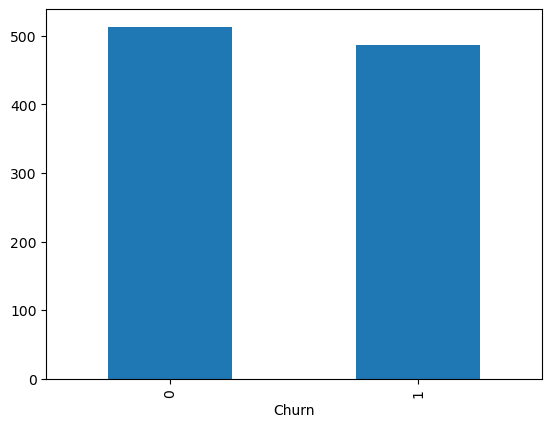

In [38]:
df.Churn.value_counts().plot(kind = 'bar')

In [39]:
df.keys()

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

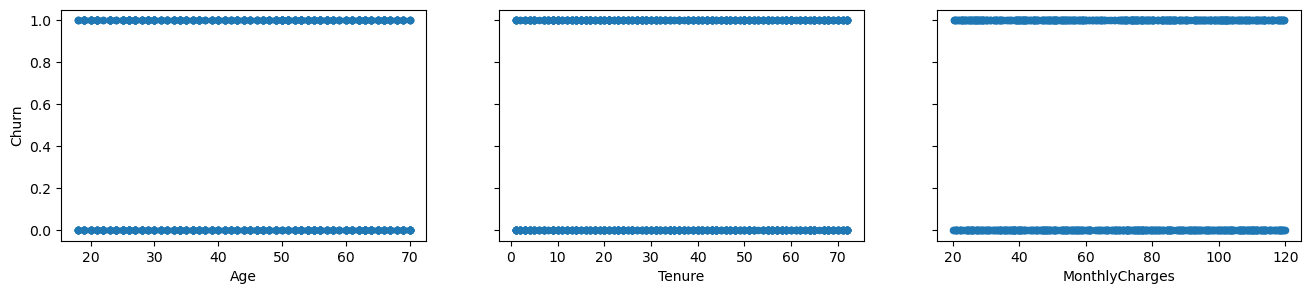

In [76]:
feature_cols = ['Age', 'Tenure', 'MonthlyCharges']
# Multiple scatterplots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    df.plot(kind='scatter', x=feature, y='Churn', ax=axs[index], figsize=(16, 3))

We did not really retrieve any useful information from the above graphs, hence we utilize the Boxgraphs to ceck if we can visually see a relationship between the features and the target variant

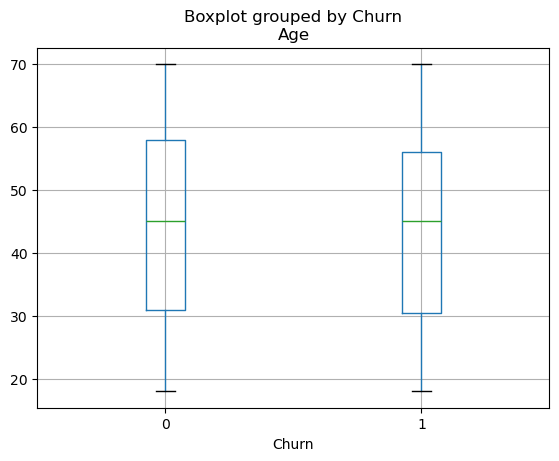

In [41]:
df.boxplot(column='Age', by='Churn');

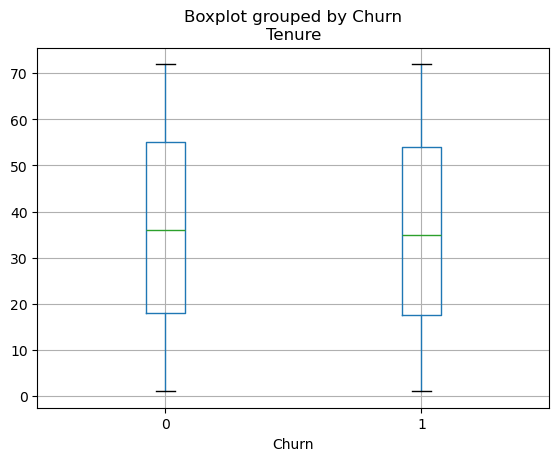

In [42]:
df.boxplot(column='Tenure', by='Churn');

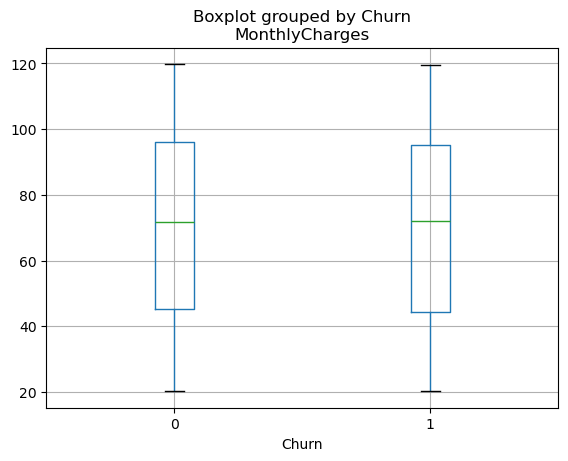

In [43]:
df.boxplot(column='MonthlyCharges', by='Churn');

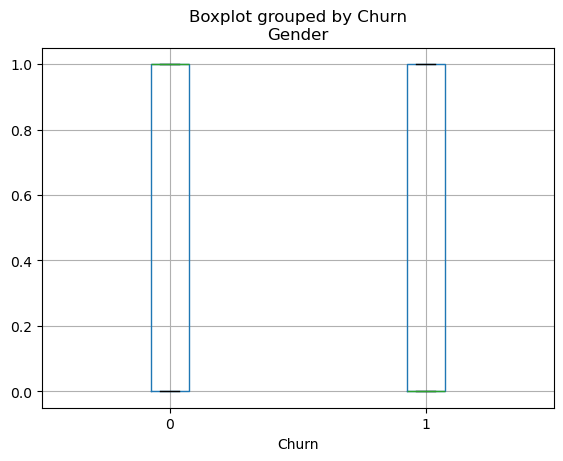

In [44]:
df.boxplot(column='Gender', by='Churn');

Although we did not see any difference based on **Gender** yet there is some insignificant variance caused by **Age, Tenure and MonthlyCharges**

In [45]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,55,2,111.22,6956.08,0,True,False,False
1,2,1,33,21,75.53,5692.23,1,True,False,False
2,3,0,30,51,94.74,4839.18,0,True,False,False
3,4,0,20,5,75.43,6706.95,0,True,False,False
4,5,1,53,47,70.88,3958.48,1,True,False,False


<Axes: xlabel='Churn'>

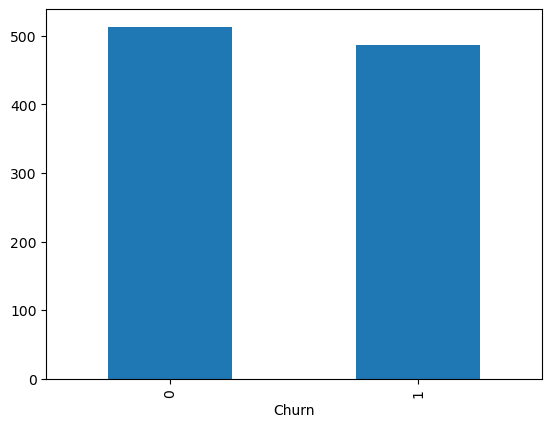

In [46]:
df.Churn.value_counts().plot.bar()

<Axes: xlabel='Age'>

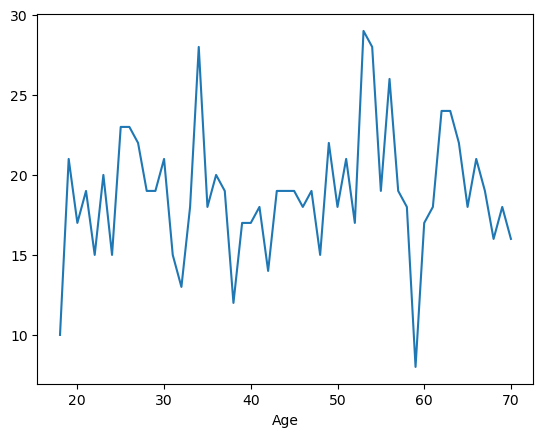

In [62]:
df.Age.value_counts().sort_index().plot()

<Axes: xlabel='Tenure'>

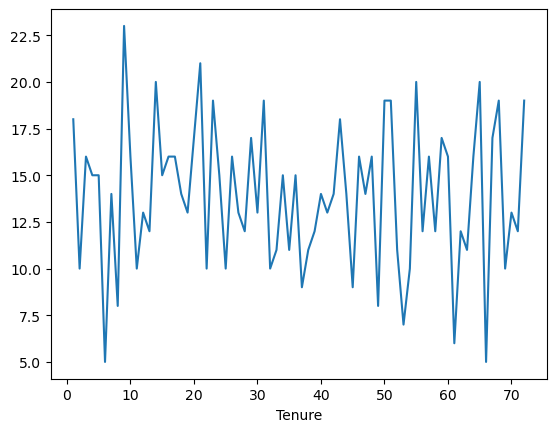

In [63]:
df.Tenure.value_counts().sort_index().plot()

<Axes: xlabel='MonthlyCharges'>

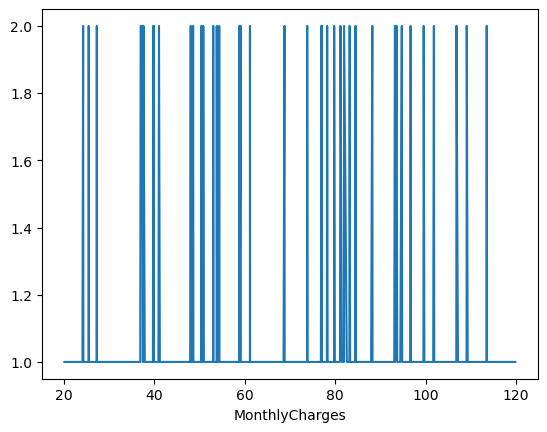

In [64]:
df.MonthlyCharges.value_counts().sort_index().plot()

<Axes: xlabel='Gender'>

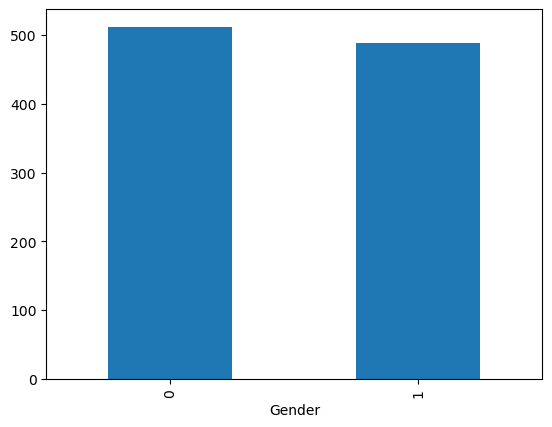

In [74]:
df.Gender.value_counts().plot(kind='bar')

# 3. Feature Selection

We will find the correlation between the feature columns of interest and create heatgraphs to visualize the correlations

In [51]:
df.corr()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
CustomerID,1.000000,0.007041,-0.008477,0.042854,-0.070124,-0.034867,-0.012028,-0.019832,-0.026546,0.046521
Gender,0.007041,1.000000,-0.013059,-0.037422,-0.017919,0.026089,-0.030643,-0.008679,0.015079,-0.006496
Age,-0.008477,-0.013059,1.000000,0.038315,0.000721,-0.024992,-0.010366,0.027620,0.048156,-0.076042
Tenure,0.042854,-0.037422,0.038315,1.000000,0.019109,0.031735,-0.003566,-0.023990,0.008604,0.015316
MonthlyCharges,-0.070124,-0.017919,0.000721,0.019109,1.000000,-0.003102,-0.013454,-0.019481,0.002218,0.017236
TotalCharges,-0.034867,0.026089,-0.024992,0.031735,-0.003102,1.000000,0.007935,-0.006415,0.026793,-0.020542
Churn,-0.012028,-0.030643,-0.010366,-0.003566,-0.013454,0.007935,1.000000,-0.015785,0.003833,0.011917
Contract_Month-to-month,-0.019832,-0.008679,0.027620,-0.023990,-0.019481,-0.006415,-0.015785,1.000000,-0.502596,-0.493652
Contract_One year,-0.026546,0.015079,0.048156,0.008604,0.002218,0.026793,0.003833,-0.502596,1.000000,-0.503733
Contract_Two year,0.046521,-0.006496,-0.076042,0.015316,0.017236,-0.020542,0.011917,-0.493652,-0.503733,1.000000


In [52]:
import seaborn as sns

<Axes: >

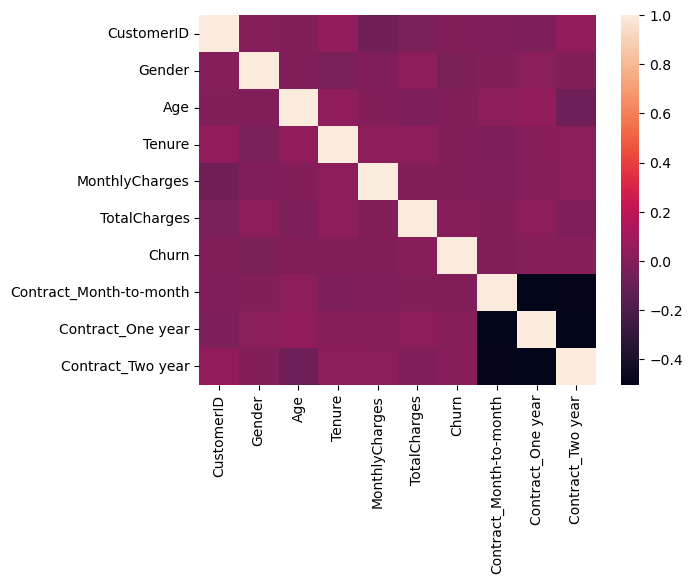

In [53]:
sns.heatmap(df.corr())

Data shows the correlation for Churn from **Age, Gender, MonthlyCharges and Contract**

# 4. Model Building

In [152]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

In [153]:
X = df[[ 'Gender', 'Age', 'MonthlyCharges','Contract_Month-to-month', 'Contract_One year','Contract_Two year']]
y = df.Churn
X.head()

,Gender,Age,MonthlyCharges,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,55,111.22,True,False,False
1,1,33,75.53,True,False,False
2,0,30,94.74,True,False,False
3,0,20,75.43,True,False,False
4,1,53,70.88,True,False,False


In [154]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=99)

scaler = StandardScaler()
# We fit to figure out the distribution
scaler.fit(X_train)

# now we transform everything using that
# if you wanted to do it all in one step ==> X_train = scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# for vizualizing the tree
import pydotplus
from IPython.display import Image 
# Create decision tree classifer object
tree_model = DecisionTreeClassifier(random_state=0,max_depth=20)
# logistic regression model fit
tree_model.fit(X_train,y_train)

# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
print('Train Score :' , tree_model.score(X_train,y_train), 'and Test Score :', tree_model.score(X_test,y_test))

[1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1]
Train Score : 0.95875 and Test Score : 0.45


We can see that the model is drastically **underperforming** due to **overfitting** the Train Score is very high whereas the the Test Score is astoundingly low

# 5. Model Evaluation